# Deep Learning
## 3️⃣ Types of Neural Networks

### Preprocessing for image classification

- **Resize** every image to same size, and unify the number of pixels.
- Unify the way **colors** are expressed (i.e. RGB, HSV, Gray-scale, Binary, ...)


### CNN (Convolution Neural Network)

#### Structure of CNN

- Convolution Layer

The process of finding out what features are in the image.   
The filter moves across the image to create a feature map.

- Pooling Layer

The process of minimalizing the effect of noise of image.   
Pooling layers reduce the dimensions of data by combining the outputs of neuron clusters at one layer into a single neuron in the next layer.

- FC (Fully-Connected Layer)

Using extracted features, FC classifies images. 
Uses Softmax function as activation function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

# Function for visualization
def Visulaize(histories, key='loss'):
    for name, history in histories:
        plt.plot(history.epoch, history.history[key], 
             label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()
    plt.xlim([0,max(history.epoch)])    
    plt.show

11493376/11490434 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 32)          9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________

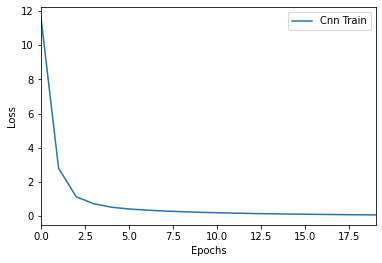

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

np.random.seed(123)
tf.random.set_seed(123)


# Load MNIST data set
mnist = tf.keras.datasets.mnist

# Split data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()    

# Use 5000 data for training, and 1000 data for test.
train_images, train_labels = train_images[:5000], train_labels[:5000]
test_images, test_labels = test_images[:1000], test_labels[:1000]

# Preprocess data : reshape the data into (number of sampels, width, height, 1) shape to use as input data for CNN model.
train_images = tf.expand_dims(train_images, -1)
test_images = tf.expand_dims(test_images, -1)


"""
1. Create CNN model. 

Conv2D(filters, kernel_size, activation, padding) creates Convolution layer.
(filters: number o filters, kernel_size: size of filter, activation: activation function, padding: 'SAME' or 'VALID')

MaxPool2D(padding) creates Pooling layer.
(padding: 'SAME' or 'VALID')

Flatten() flattens output of convolution layer or pooling layer.

Dense(node, activation) creates FC. 
(node: number of nodes, activation: activation function)
"""
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME', input_shape = (28,28,1)),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu', padding = 'SAME'),
    tf.keras.layers.MaxPool2D(padding = 'SAME'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

print(model.summary())

# Set a learning method for the CNN model.
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
              
# Train the model. 
history = model.fit(train_images, train_labels, epochs = 20, batch_size = 512)

# Print the result of training.
Visulaize([('CNN', history)], 'loss')